In [1]:
#Import required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Downloading Dataset Walmart.csv

In [4]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: C:\Users\Dell\walmart_data.csv

  0%|          | 0.00/23.0M [00:00<?, ?B/s]
  2%|2         | 524k/23.0M [00:00<00:09, 2.49MB/s]
  5%|4         | 1.05M/23.0M [00:00<00:06, 3.33MB/s]
  7%|6         | 1.57M/23.0M [00:00<00:06, 3.18MB/s]
  9%|9         | 2.10M/23.0M [00:00<00:06, 3.41MB/s]
 11%|#1        | 2.62M/23.0M [00:00<00:05, 3.48MB/s]
 14%|#3        | 3.15M/23.0M [00:00<00:05, 3.38MB/s]
 16%|#5        | 3.67M/23.0M [00:01<00:06, 3.10MB/s]
 18%|#8        | 4.19M/23.0M [00:01<00:05, 3.30MB/s]
 20%|##        | 4.72M/23.0M [00:01<00:05, 3.25MB/s]
 23%|##2       | 5.24M/23.0M [00:01<00:05, 3.49MB/s]
 27%|##7       | 6.29M/23.0M [00:01<00:04, 3.95MB/s]
 30%|##9       | 6.82M/23.0M [00:01<00:04, 4.00MB/s]
 32%|###1      | 7.34M/23.0M [00:02<00:04, 3.72MB/s]
 36%|###6      | 8.39M/23.0M [00:02<00:03, 4.22MB/s]
 39%|###8      | 8.91M/23.0M [00:02<00:03, 4.36MB/s]
 43%|###

Problem Statement: The management of Walmart collected the transactional data of customers and want to analyse the purchase characteristics of the customers during the Black Friday sale. 
Datataset has Different columns like User_ID, Product_ID,Gender,Age,Occupation,City_Category,Stay_IN_Current_City_Tears,Marital_Status,Product_Category and Purchase.
The main aim is to find the purchase according to male and female as if Who spends more during the Black Friday sale.
1. Male spent vs Female_spent
2.Married / Unmarried 
3.Age wise 
Different Categories are(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'])

In [5]:
df = pd.read_csv("C:/Users/Dell/walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [6]:
df.shape

(550068, 10)

#The dataset contain around 5.5million rows of data and 10 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#Dataset do not have any NULL values in it.

#Creating one more column categorical saying User Married or Unmarried. provided 0 for Unmarried and 1 for Married 

In [8]:
def Marital_Status_Category(val):
    if val == 0 :
        return "Unmarried"
    else:
        return "Married"
df["Marital_Status_category"] = df["Marital_Status"].apply(Marital_Status_Category)
##Sample space = ("Married, Unmarried")

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [10]:
df.describe(include= "object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status_category,550068,2,Unmarried,324731


#From the above table we can infer that
1.The most popular product is P00265242
2.Unmarried people are more contributed in the Black Friday Sale
3.Specially unmarried Male are the Top contributors is what can infer from the column Married Gender.

In [11]:
#converting Stay_In_Current_City_Years  into category

In [12]:
#Replace '4+' to 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype("category")

In [13]:
#changing it from object dtype to category  to save memory
df["Age"]=df["Age"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["City_Category"]=df["City_Category"].astype("category")
df["Product_Category"]=df["Product_Category"].astype("category")

In [14]:
#Get TOP 10 product sold during sale.

In [15]:
temp=df['Product_ID'].value_counts().reset_index()
temp.columns=['Product_ID','Count']
temp=temp.sort_values(by='Count', ascending=False)
temp.head(10)

,Product_ID,Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


The top 10 sold product IDs are mentioned above with its total count of sales. P00265242 is the Top selling Product

In [16]:
temp=df.groupby(['Product_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887
1030,P00112142,24216006
1018,P00110942,23639564
2263,P00237542,23425576
565,P00057642,23102780
104,P00010742,22164153


The total sum of each product during Black Friday sale is shown in the above table. These are the TOP 10 contributing Products in our revenue. 

In [17]:
temp=df.groupby(['User_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


These are the TOP 10 customers contributing in black Friday sale.

So These Customers should be rewarded or given some more different offers so as to increase the revenue of our company.

# Non graphical Analysis(Unique Values and Value Counts)

In [18]:
for i in df.columns:
    print(f'{i} has {df[i].nunique()} unique values')
    print(""*20)

User_ID has 5891 unique values

Product_ID has 3631 unique values

Gender has 2 unique values

Age has 7 unique values

Occupation has 21 unique values

City_Category has 3 unique values

Stay_In_Current_City_Years has 5 unique values

Marital_Status has 2 unique values

Product_Category has 20 unique values

Purchase has 18105 unique values

Marital_Status_category has 2 unique values



In [19]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("~"*20)
    print(df.iloc[:,i].value_counts())
    print("-"*40)
    print()

User_ID
~~~~~~~~~~~~~~~~~~~~
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
----------------------------------------

Product_ID
~~~~~~~~~~~~~~~~~~~~
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
----------------------------------------

Gender
~~~~~~~~~~~~~~~~~~~~
M    414259
F    135809
Name: Gender, dtype: int64
----------------------------------------

Age
~~~~~~~~~~~~~~~~~~~~
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
----------------------------------------

Occupation
~~~~~~~~~~~~~~~~~~~~
4     72308
0     69638
7     59133
1 

In [20]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
Marital_Status_category           2
dtype: int64

Purchase is the amount of purchase. it is continuous variables.

User_ID,Product_ID are for identification purpose.

Gender, Age, Occupation,city_category,Stay_In_Current_City_Years,Marital_status,product_category are Categorical Variables.

# Visual Analysis

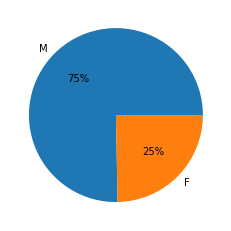

In [21]:
data = df["Gender"].value_counts(normalize = True)*100
plt.pie(x = data.values, labels=data.index, autopct='%.0f%%')
plt.show()

From here we can infer that the 75% population in given dataset is Male. and that of Female is 25%

Actually Out of 5.5L total customers Male Users are 4.2L+ and female are 1.4L+. That is we can say the distribution of Male and female customers id 3:1 

In [22]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

#The topmost category is 26-35. Actually Users in this age range are contributing most in the sale. Followed by age range 36-45.

<AxesSubplot:xlabel='Age', ylabel='count'>

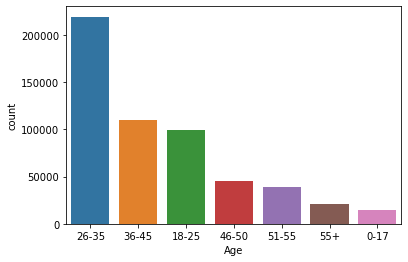

In [23]:
sns.countplot(df["Age"], order = df["Age"].value_counts().index)

#It can be seen that age group 26-35 is most active in black Friday sale.

<AxesSubplot:xlabel='Age', ylabel='count'>

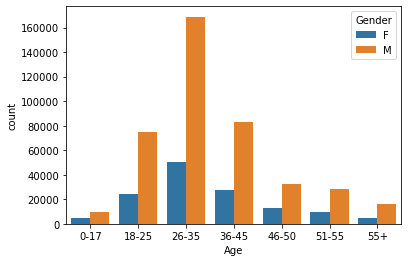

In [24]:
sns.countplot(df["Age"],hue = df["Gender"])

Males in the age group 26-35 are more active in blackfriday sale. 

Males of the age group 18-25 and 36 - 45 are also more active than female of age group 26 to 35.

<AxesSubplot:xlabel='Age', ylabel='count'>

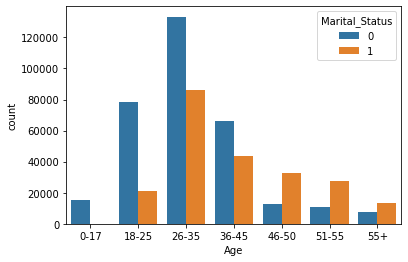

In [25]:
sns.countplot(df["Age"], hue = df["Marital_Status"])

We can infer that mostly unmarried people from age group  18-25 to 36-45 are more active in black friday sale  

Whereas Married people from age group 26-45 are more active in black friday sale

So here we can see that may be married men must be paying for the purchase of their spouses.

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

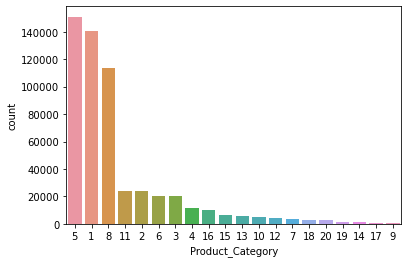

In [26]:
sns.countplot(df["Product_Category"], order = df["Product_Category"].value_counts().index)

Product 1,5, and 8 are the highest selling products out of all 20.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

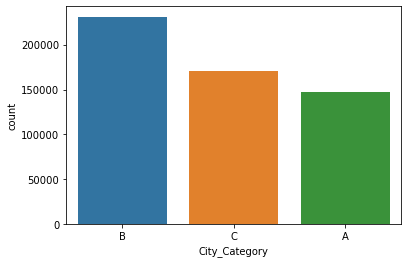

In [27]:
sns.countplot(df["City_Category"], order = df["City_Category"].value_counts().index)

Maximum Users are from the City B

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

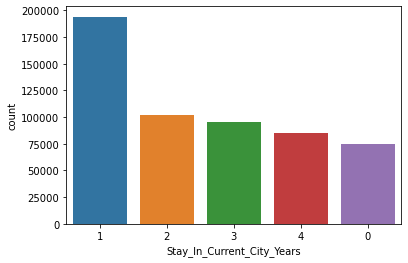

In [28]:
sns.countplot(df["Stay_In_Current_City_Years"], order = df["Stay_In_Current_City_Years"].value_counts().index)

People who are living for more than a year in a particular country are buying more and spending more in the sale.

In [29]:
df["Married_Gender"] = df.apply(lambda x: (x["Gender"], x["Marital_Status"]), axis = 1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_Status_category,Married_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Unmarried,"(F, 0)"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Unmarried,"(F, 0)"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Unmarried,"(F, 0)"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Unmarried,"(F, 0)"
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,Unmarried,"(M, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,Married,"(M, 1)"
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,Unmarried,"(F, 0)"
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137,Married,"(F, 1)"
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,Unmarried,"(F, 0)"


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

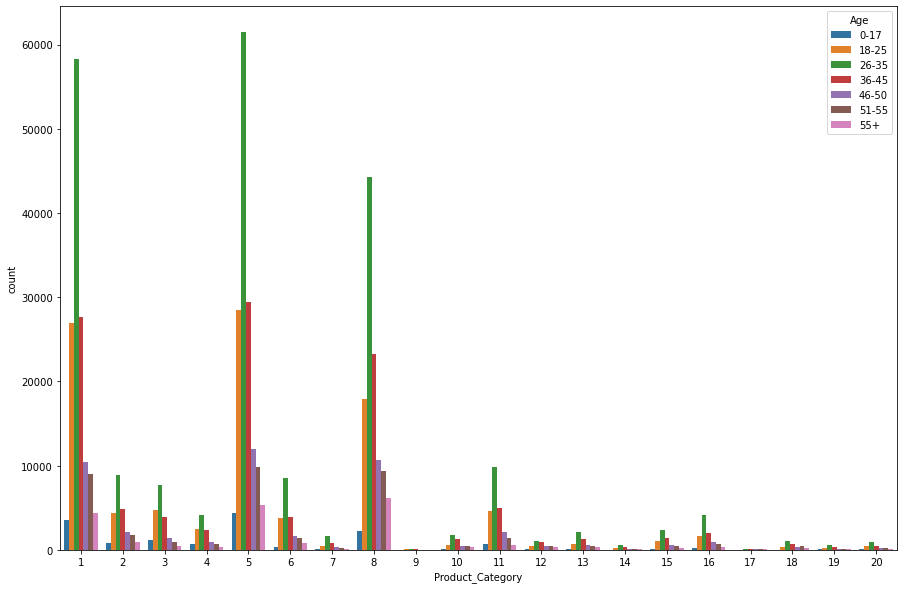

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(df['Product_Category'], hue=df['Age'])

Product 1 5 and 8 are the highest purchased and biggest contributor is the age category 26-35.
Where as sale of peoduct 9 and 17 is negligible.

<AxesSubplot:xlabel='Age', ylabel='count'>

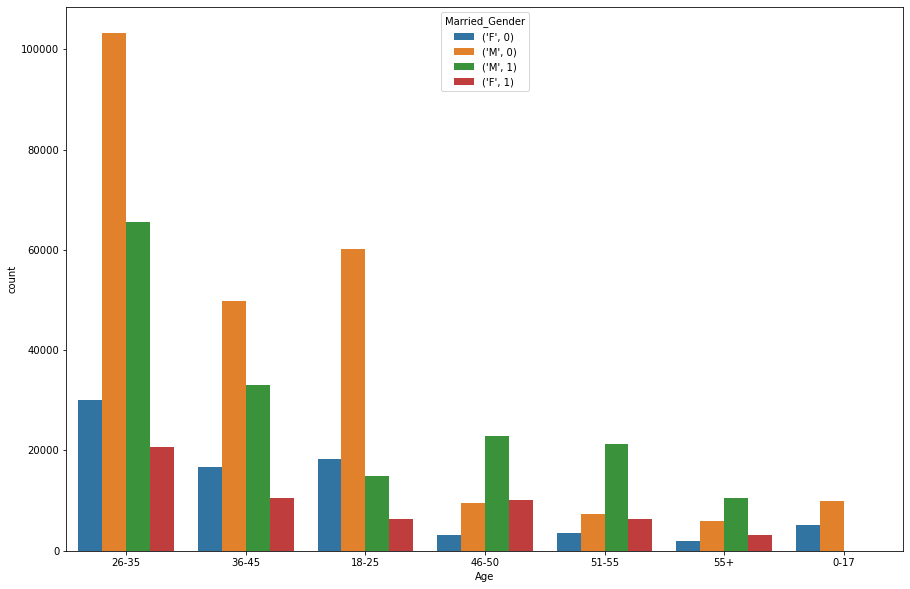

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(df["Age"], hue = df["Married_Gender"], order = df["Age"].value_counts().index)

The above plot shows 4 categories. 
Unmarried Female: Unmarried Female till the age of 45 spend more than married Females. Where as after the age of 45 46 married woman expense is increased. Must be buying for their kids.
Unmarried Male: Unmarried Male in the Age range 26-35 in the topmost contributor of the black friday sale. After the age of 45 Married Male expense in more than the Unarried male as same for the men and women. They have their kids responsibilities at the most priority level. 
Married Female : Married female purchase is actually very low as compared to other categories as it seems only married Working Females spend for themselves else many Males spend for their spouse.
Married Male:In the Age range 26 to 45 the most responsibilities zone, It seems Married Male have the maximum expense. Must be buying for their chidren, their spouse.

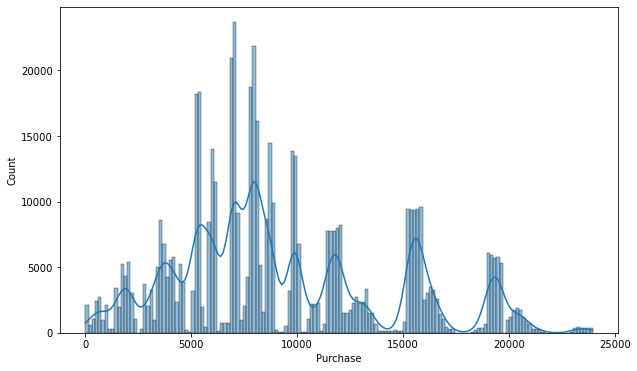

In [32]:
#Univariate Analysis
#Understanding the distribution of data and detecting outliers for continuous variables
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

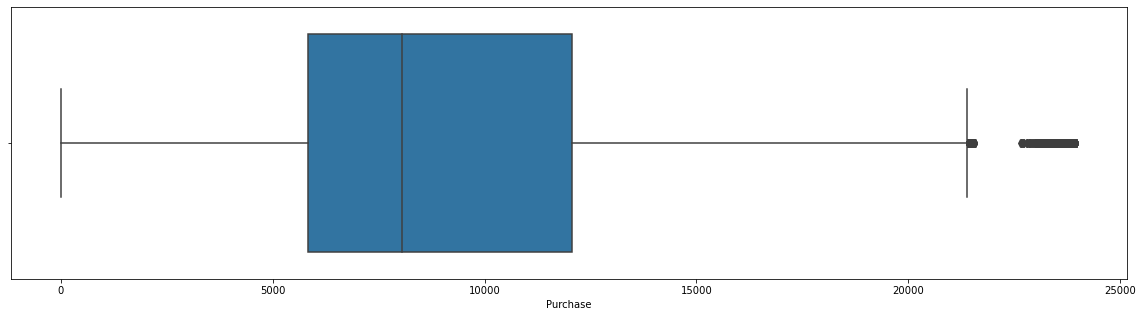

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()


#Observation:
Purchase is having outliers

In [34]:
#Handling outliers
df1 = df.copy()

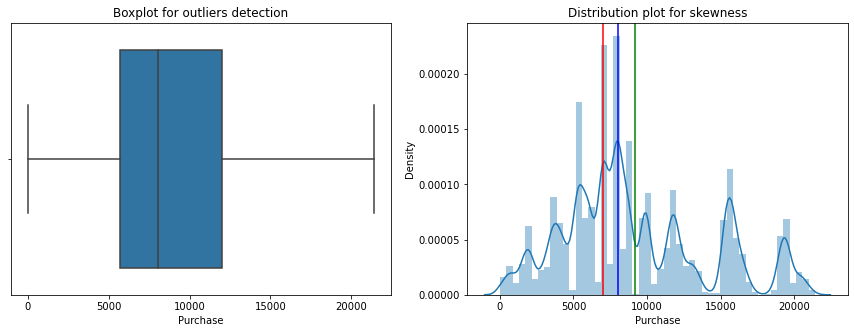

In [35]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df1['Purchase'].quantile(0.75)
Q1 = df1['Purchase'].quantile(0.25)
IQR = Q3-Q1
df1 = df1[(df1['Purchase'] > Q1 - 1.5*IQR) & (df1['Purchase'] < Q3 + 1.5*IQR)]
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.boxplot(df1["Purchase"])
plt.title("Boxplot for outliers detection")
plt.xlabel('Purchase')

plt.subplot(1,2,2)
sns.distplot(df1["Purchase"])

plt.title("Distribution plot for skewness")
plt.ylabel('Density')
plt.xlabel('Purchase')
plt.axvline(df1["Purchase"].mean(),color="g")
plt.axvline(df1["Purchase"].median(),color="b")
plt.axvline(df1["Purchase"].mode()[0],color="r")

plt.show()

In [36]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("~"*30)
    print(df.iloc[:,i].value_counts(normalize = True)*100)
    print("-"*50)
    print()

User_ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1001680    0.186522
1004277    0.177978
1001941    0.163253
1001181    0.156708
1000889    0.149618
             ...   
1002690    0.001273
1002111    0.001273
1005810    0.001273
1004991    0.001273
1000708    0.001091
Name: User_ID, Length: 5891, dtype: float64
--------------------------------------------------

Product_ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
               ...   
P00314842    0.000182
P00298842    0.000182
P00231642    0.000182
P00204442    0.000182
P00066342    0.000182
Name: Product_ID, Length: 3631, dtype: float64
--------------------------------------------------

Gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
M    75.310507
F    24.689493
Name: Gender, dtype: float64
--------------------------------------------------

Age
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51

In [37]:
for i in range(df.shape[1]):
    print(df.columns[i], "-", df[df.columns[i]].nunique())
    print("~"*20)
    print(df.iloc[:,i].unique())
    print("-"*100)
    print()

User_ID - 5891
~~~~~~~~~~~~~~~~~~~~
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
----------------------------------------------------------------------------------------------------

Product_ID - 3631
~~~~~~~~~~~~~~~~~~~~
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
----------------------------------------------------------------------------------------------------

Gender - 2
~~~~~~~~~~~~~~~~~~~~
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------------------------------------

Age - 7
~~~~~~~~~~~~~~~~~~~~
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
----------------------------------------------------------------------------------------------------

Occupation - 21
~~~~~~~~~~~~~~~~~~~~
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
-----------------------------

From above nunique function we get to know about most of the data seems to be Categorical
User_ID	and Product_ID and Purchase are the ones which can be used for differntiating
Gender,	Age, Occupation, City_Category,	Stay_In_Current_City_Years,	Marital_Status and Product_Category are categorical. 
Most categories are of Occupation == Total 21 and Product_Categories that is 21 different product . 

# Purchased by Male i. e. Spent by male in Black Friday Sale

In [38]:
df_Male = df[df["Gender"] == "M"]["Purchase"]
df_Male

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [39]:
df_Male.mean()

9437.526040472265

In [40]:
#Purchased byFemale i. e. Spent by female in Black Friday Sale
#Sample size taken in 1000

In [41]:
df_Female = df[df["Gender"] == "F"]["Purchase"]
df_Female.shape

(135809,)

In [42]:
df_Female.mean()

8734.565765155476

<AxesSubplot:xlabel='Gender', ylabel='count'>

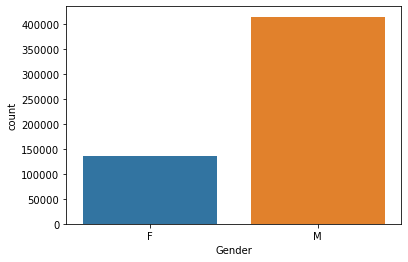

In [43]:
sns.countplot(df["Gender"])

# Answering questions (50 Points)

# Are women spending more money per transaction than men? Why or Why not? (10 Points)

#SO women are spending less money as compared to male per transaction
As female_mean = 8734 approximately
and male_mean = 9437
So Per transaction expense of male is higher than female.
We can infer from the dataset that product for female also have been purchased but paid by or purchased by their spouses for them That can be one reason.
Or As I have recommended that new products, discounts and offers to be given for female customers to increase their spent in the sale.

# Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)

In [44]:
bootstrapped_male_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Male, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_male_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

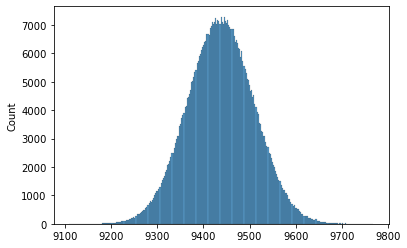

In [45]:
sns.histplot(bootstrapped_male_survey)

#As we can see after taking sample size = 5000 for men.
This histplot can be seen the perfect bell curve showing the Gaussion Distribution.
Below we have found out all the Confidence Interval.


# CI of male purchases= 90%

In [46]:
np.percentile(bootstrapped_male_survey, [5,95]) # 90% Confidence Interval

array([9319.33822, 9556.20417])

# CI of male purchases= 95%

In [47]:
np.percentile(bootstrapped_male_survey, [2.5,97.5]) # 95% Confidence Interval

array([9296.590285, 9579.11493 ])

# CI of male purchases= 99%

In [48]:
np.percentile(bootstrapped_male_survey, [0.5,99.5]) # 99% Confidence Interval

array([9252.981679, 9623.618516])

In [49]:
bootstrapped_female_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Female, size = 1000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_female_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

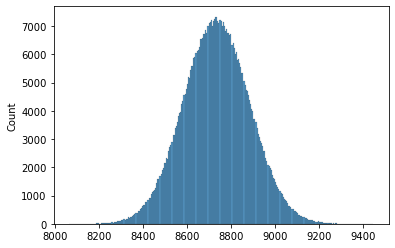

In [50]:
sns.histplot(bootstrapped_female_survey)

# CI of female purchases= 90%

In [51]:
np.percentile(bootstrapped_female_survey, [5,95]) # 90% Confidence Interval

array([8487.3971, 8983.675 ])

# CI of female purchases= 95%

In [52]:
np.percentile(bootstrapped_female_survey, [2.5,97.5]) # 95% Confidence Interval

array([8440.277375, 9031.86465 ])

# CI of female purchases= 99%

In [53]:
np.percentile(bootstrapped_female_survey, [0.5,99.5]) # 99% Confidence Interval

array([8348.07301 , 9126.857955])

# Purchased by Married i. e. Spent by married in Black Friday Sale

In [54]:
df_Married = df[df["Marital_Status_category"] == "Married"]["Purchase"]
df_Married

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64

In [55]:
df_Unmarried = df[df["Marital_Status_category"] == "Unmarried"]["Purchase"]
df_Unmarried

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64

#We can infer that the data given to us having more unmarried Users than married users. The ratio is around ^):$) of Unmarried and Married

In [56]:
df_Married.mean()

9261.174574082374

In [57]:
df_Unmarried.mean()

9265.907618921507

If we check mean for both Married and Unmarried , it is almost same i.e 9261 for married and 9265 for Unmarried

In [58]:
bootstrapped_married_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Married, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_married_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

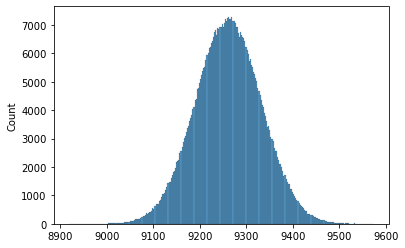

In [59]:
sns.histplot(bootstrapped_married_survey)

# CI of purchases of Married population= 90%

In [60]:
np.percentile(bootstrapped_married_survey, [5,95]) # 90% Confidence Interval

array([9144.52394, 9378.4216 ])

# CI of purchases of Married population= 95%

In [61]:
np.percentile(bootstrapped_married_survey, [2.5,97.5]) # 95% Confidence Interval

array([9122.345425, 9400.59046 ])

# CI of purchases of Married population= 99%

In [62]:
np.percentile(bootstrapped_married_survey, [0.5,99.5]) # 99% Confidence Interval

array([9078.906813, 9444.9096  ])

In [63]:
bootstrapped_unmarried_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Unmarried, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_unmarried_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

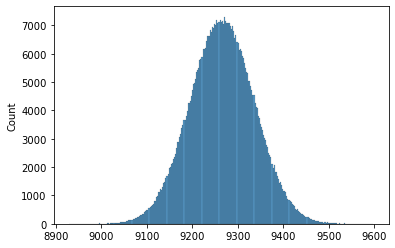

In [64]:
sns.histplot(bootstrapped_unmarried_survey)

From  here too we infer that confidence interval for 90%, 95%, 99% are overlapping each other. 

In [65]:
np.percentile(bootstrapped_unmarried_survey, [5,95]) # 90% Confidence Interval

array([9148.83121, 9382.9992 ])

In [66]:
np.percentile(bootstrapped_unmarried_survey, [2.5,97.5]) # 95% Confidence Interval

array([9126.51328, 9405.46064])

In [67]:
np.percentile(bootstrapped_unmarried_survey, [0.5,99.5]) # 99% Confidence Interval

array([9082.954802, 9449.336198])

# Purchased by Different Age Groups such as : 0-17, 18-25, 26-35, 36-50, 51+ years. in Black Friday Sale


In [68]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [69]:
df_Age_0_17 = df[df["Age"] == "0-17"]["Purchase"]

In [70]:
bootstrapped_0_17_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_0_17, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_0_17_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

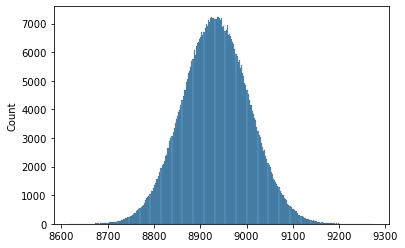

In [71]:
sns.histplot(bootstrapped_0_17_survey)

# 90% Confidence Interval

In [72]:
np.percentile(bootstrapped_0_17_survey, [5,95])

array([8814.68668, 9052.91498])

# 95% Confidence Interval

In [73]:
np.percentile(bootstrapped_0_17_survey, [2.5,97.5])

array([8792.026605, 9076.053595])

# 99% Confidence Interval

In [74]:
np.percentile(bootstrapped_0_17_survey, [0.5,99.5])

array([8748.302425, 9120.362591])

In [75]:
df_Age_18_25 = df[df["Age"] == "18-25"]["Purchase"]

In [76]:
bootstrapped_18_25_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_18_25, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_18_25_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

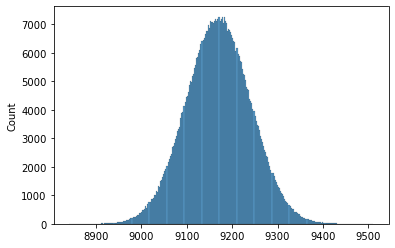

In [77]:
sns.histplot(bootstrapped_18_25_survey)

# 90% Confidence Interval

In [78]:
np.percentile(bootstrapped_18_25_survey, [5,95])

array([9052.85673, 9287.15396])

# 95% Confidence Interval

In [79]:
np.percentile(bootstrapped_18_25_survey, [2.5,97.5])

array([9030.478955, 9309.438565])

# 99% Confidence Interval

In [80]:
np.percentile(bootstrapped_18_25_survey, [0.5,99.5])

array([8987.13455 , 9353.173796])

In [81]:
df_Age_26_35 = df[df["Age"] == "26-35"]["Purchase"]

In [82]:
bootstrapped_26_35_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_26_35, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_26_35_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

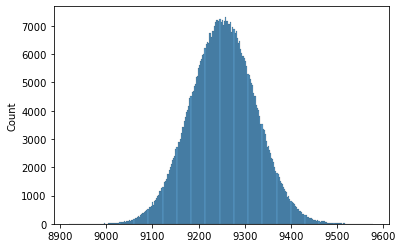

In [83]:
sns.histplot(bootstrapped_26_35_survey)

# 90% Confidence Interval

In [84]:
np.percentile(bootstrapped_26_35_survey, [5,95])

array([9136.22507, 9369.11498])

# 95% Confidence Interval

In [85]:
np.percentile(bootstrapped_26_35_survey, [2.5,97.5])

array([9114.02462, 9391.54073])

# 99% Confidence Interval

In [86]:
np.percentile(bootstrapped_26_35_survey, [0.5,99.5])

array([9071.162149, 9435.860297])

In [87]:
df_Age_36_45 = df[df["Age"] == "36-45"]["Purchase"]

In [88]:
bootstrapped_36_45_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_36_45, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_36_45_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

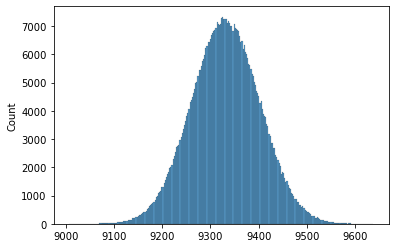

In [89]:
sns.histplot(bootstrapped_36_45_survey)

# 90% Confidence Interval

In [90]:
np.percentile(bootstrapped_36_45_survey, [5,95])

array([9214.66765, 9448.40848])

# 95% Confidence Interval

In [91]:
np.percentile(bootstrapped_36_45_survey, [2.5,97.5])

array([9192.395  , 9470.75453])

In [92]:
np.percentile(bootstrapped_36_45_survey, [0.5,99.5])

array([9148.78132 , 9514.553442])

In [93]:
df_Age_46_50 = df[df["Age"] == "46-50"]["Purchase"]

In [94]:
bootstrapped_46_50_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_46_50, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_46_50_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

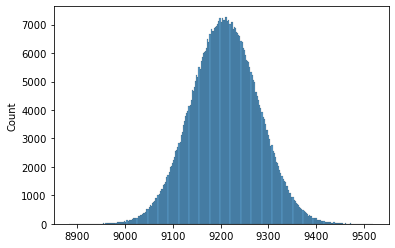

In [95]:
sns.histplot(bootstrapped_46_50_survey)

# 90% Confidence Interval

In [96]:
np.percentile(bootstrapped_46_50_survey, [5,95])

array([9093.45776, 9324.1965 ])

# 95% Confidence Interval

In [97]:
np.percentile(bootstrapped_46_50_survey, [2.5,97.5])

array([9071.26754 , 9346.245525])

# 99% Confidence Interval

In [98]:
np.percentile(bootstrapped_46_50_survey, [0.5,99.5])

array([9028.492744, 9389.185982])

In [99]:
df_Age_51_55 = df[df["Age"] == "51-55"]["Purchase"]

In [100]:
bootstrapped_51_55_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_51_55, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_51_55_survey.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

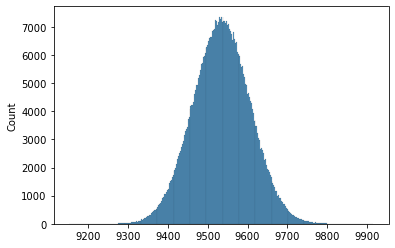

In [101]:
sns.histplot(bootstrapped_51_55_survey)

# 90% Confidence Interval

In [102]:
np.percentile(bootstrapped_51_55_survey, [5,95])

array([9416.56167, 9653.45719])

# 95% Confidence Interval

In [103]:
np.percentile(bootstrapped_51_55_survey, [2.5,97.5])

array([9394.323155, 9676.226725])

# 99% Confidence Interval

In [104]:
np.percentile(bootstrapped_36_45_survey, [0.5,99.5])

array([9148.78132 , 9514.553442])

In [105]:
df_Age_55+ = df[df["Age"] == "55+"]["Purchase"]

SyntaxError: invalid syntax (2289217820.py, line 1)

In [ ]:
bootstrapped_55+_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_55+, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_55+_survey.append(bootstrapped_mean)

In [ ]:
sns.histplot(bootstrapped_55+_survey)

# 90% Confidence Interval

In [ ]:
np.percentile(bootstrapped_55+_survey, [5,95])

# 95% Confidence Interval

In [ ]:
np.percentile(bootstrapped_55+_survey, [2.5,97.5])

# 99% Confidence Interval

In [ ]:
np.percentile(bootstrapped_55+_survey, [0.5,99.5])

# CLT

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

In [ ]:
sns.displot( x='Purchase', data=df, hue='Gender', bins=25)


so, Here we are taking 300 random samples from the data and take its mean. we do this 1000 times.

According to CLT, it should be normally distributed.

In [ ]:
sample_size = 300
Iterations = 1000

# Male and female purchase comparison

In [ ]:
male_expense_mean=[df[df['Gender']=='M']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

In [ ]:
female_expense_mean=[df[df['Gender']=='F']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

In [ ]:
sns.distplot(male_expense_mean,bins=100)

In [ ]:
sns.distplot(female_expense_mean,bins=100)

# Married and Unmarried purchase comparison

In [ ]:
married_expense_mean=[df[df['Marital_Status_category']=='Married']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

In [ ]:
unmarried_expense_mean=[df[df['Marital_Status_category']=='Unmarried']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

In [ ]:
sns.distplot(married_expense_mean,bins=100)

In [ ]:
sns.distplot(unmarried_expense_mean,bins=1000)

In [ ]:
age_group_expense_mean = []
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    age_group_expense_mean.append([df[df['Age']== val ]['Purchase'].sample(sample_size).mean() for i in range(Iterations)])
    sns.distplot(age_group_expense_mean,bins=100)

From here we can infer that almostall the ages category purchases are overlapping.

In [ ]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (20,16))
sns.countplot(x = "Age", hue ="Gender", data = df, ax=axis[0,0])
sns.countplot(x = "Age", hue ="Marital_Status_category", data = df, ax=axis[0,1])
sns.countplot(x = "Gender", hue ="Marital_Status_category", data = df, ax=axis[0,2])
sns.countplot(x = "Age", hue ="City_Category", data = df, ax=axis[1,0])
sns.countplot(x = "City_Category", hue ="Marital_Status_category", data = df, ax=axis[1,1])
sns.countplot(x = "City_Category", hue ="Gender", data = df, ax=axis[1,2])

axis[0,0].set_title("Age vs Gender")
axis[0,1].set_title("Age vs Marital_Status_category")
axis[0,2].set_title("Gender vs Marital_Status_category")
axis[1,0].set_title("Age vs City_Category")
axis[1,1].set_title("City_Category vs Marital_Status_category")
axis[1,2].set_title("City_Category vs Gender")

plt.show()

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="User_ID", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Occupation", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Product_Category", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Purchase", kde=True, ax=axis[1,1])
axis[0,0].set_title("User_ID count")
axis[0,1].set_title("Occupation Count")
axis[1,0].set_title("Product_Category Count")
axis[1,1].set_title("Purchase Count")

plt.show()


In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

In [ ]:
#plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

# Perform the same activity for Married vs Unmarried and Age For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

In [ ]:
sns.displot( x='Purchase', data=df, hue='Marital_Status', bins=25)

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

In [ ]:
data = df['Age'].value_counts(normalize=True)*100

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
#palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%') # colors=palette_color)
axs[0].set_title("Age wise Distribution of Users of Black friday sale")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
#palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%')# colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years distribution")
plt.show()

# INSIGHTS:

1. Maximum i.e. 75% are the male population whereas 25% only is female population.
2. Most active age group is 26-35, So as to give 
3. 26-35 age group is most active and having maximum involvement.
4. Product Category 1,5 and 8 are having maximum demand.
5. Most users belong to country B
6. Unmarried male > Married male > Unmarried female> Married female is the flow of the Users purchase value.
7. people who are living in city for one year are doing more shopping than others

# Recommendations

1. Different new Items for Female should be added as to attract them as we see very less involvement of females in the sale.
2. Age 0-17 and 55+ is the least, so to bring more products for these categories and attracting discounts and offers can be increased so as to increase this count. Age plays a crucial role in purchasing power, products appealing to older people are pretty rare as per the data.there could be more awareness created about the products sold at supermarket, it is an unsaturated market.
3. Maintain the stock of the most demanded products (like 1 , 5 , 8 ).
4. The stock of all the required products in the country B should be maintained.
5. Product to attract or tempt woman are lagging as we can see less involvement of women , so to increase the revenue more products or offers or discounts for female to be given so as to increase women involvement.
6. Married and unmarried people tend to have no difference in spending patterns, but they do have significant differences in product patterns, targteting those products will be a good start
7. cThe data stays true to CLT and has approimately the same mean and median even for sampled data asdemonstrated above